# UBER TRIP ANALYSIS MACHINE LEARNING PROJECT

## Objectives

**The primary objectives of this notebook are:**

* Data Exploration and Visualization: Conduct an in-depth exploration of the 2014 Uber trip data, identifying patterns, trends, and seasonality through various visual and statistical techniques.
* Time Series Decomposition: Apply decomposition techniques to break down the data into trend, seasonality, and residual components to better understand temporal dynamics.
* Feature Engineering: Implement window-based (lagged) features to enhance the model’s ability to capture temporal dependencies and trends.
* Model Training: Develop and train three machine learning models—XGBoost, Random Forest, and Gradient Boosted Tree Regressor (GBTR)—using the engineered features.
* Model Evaluation: Evaluate the models' performance using Mean Absolute Percentage Error (MAPE) as the primary metric for accuracy and reliability.
* Ensemble Techniques: Design and apply an ensemble model that integrates predictions from the individual models to improve overall forecasting performance.
* Comparative Analysis: Compare the individual models and ensemble approach to highlight their strengths, limitations, and predictive capabilities.
* Insights and Recommendations: Summarize key findings and provide actionable recommendations based on model performance and data insights.

### Data Loading

#### 1. Loading Modules

In [5]:
import numpy as np #linear algebra
import pandas as pd #data processing

#visualization modules
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib import cm #colormap

#### 2. Loading datasets

In [6]:
df_apr14 = pd.read_csv(r"CSV Files\uber-raw-data-apr14.csv")
df_may14 = pd.read_csv(r"CSV Files\uber-raw-data-may14.csv")
df_jun14 = pd.read_csv(r"CSV Files\uber-raw-data-jun14.csv")
df_jul14 = pd.read_csv(r"CSV Files\uber-raw-data-jul14.csv")
df_aug14 = pd.read_csv(r"CSV Files\uber-raw-data-aug14.csv")
df_sep14 = pd.read_csv(r"CSV Files\uber-raw-data-sep14.csv")

### Merging datasets into one

In [7]:
df = pd.concat([df_apr14, df_may14, df_jun14, df_jul14, df_aug14, df_sep14], ignore_index=True)

### Data Preparation

In [8]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [10]:
print(df)

                  Date/Time      Lat      Lon    Base
0          4/1/2014 0:11:00  40.7690 -73.9549  B02512
1          4/1/2014 0:17:00  40.7267 -74.0345  B02512
2          4/1/2014 0:21:00  40.7316 -73.9873  B02512
3          4/1/2014 0:28:00  40.7588 -73.9776  B02512
4          4/1/2014 0:33:00  40.7594 -73.9722  B02512
...                     ...      ...      ...     ...
4534322  9/30/2014 22:57:00  40.7668 -73.9845  B02764
4534323  9/30/2014 22:57:00  40.6911 -74.1773  B02764
4534324  9/30/2014 22:58:00  40.8519 -73.9319  B02764
4534325  9/30/2014 22:58:00  40.7081 -74.0066  B02764
4534326  9/30/2014 22:58:00  40.7140 -73.9496  B02764

[4534327 rows x 4 columns]


### Data Cleaning

In [11]:
#Renaming the Date/Time Column
df.rename(columns={'Date/Time':'Date_time'},inplace=True)

#Converting the Date_Time dtype to Datetime
df['Date_time'] = pd.to_datetime(df['Date_time'])

#Adding additional columns
df['Month'] = df['Date_time'].dt.month_name()
df['Weekday'] = df['Date_time'].dt.day_name()
df['Day'] = df['Date_time'].dt.day
df['Hour'] = df['Date_time'].dt.hour
df['Minute'] = df['Date_time'].dt.minute

df.columns

Index(['Date_time', 'Lat', 'Lon', 'Base', 'Month', 'Weekday', 'Day', 'Hour',
       'Minute'],
      dtype='object')

In [12]:
df.head()

,Date_time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,April,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,April,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,April,Tuesday,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,April,Tuesday,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,April,Tuesday,1,0,33


In [13]:
df.duplicated().sum()

np.int64(82581)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.isnull().sum()

Date_time    0
Lat          0
Lon          0
Base         0
Month        0
Weekday      0
Day          0
Hour         0
Minute       0
dtype: int64

## Data Analysis

### 1. Trips by Hour

In [17]:
# Grouping by Hour and counting the number of rows (trips)
df_hour = df.groupby(['Hour']).size().reset_index(name='Number_of_trips')

# Setting 'Hour' as the index
df_hour.set_index('Hour', inplace=True)


df_hour.head()



,Number_of_trips
Hour,
0,101876
1,65913
2,44898
3,47331
4,54246


#### Plotting the results

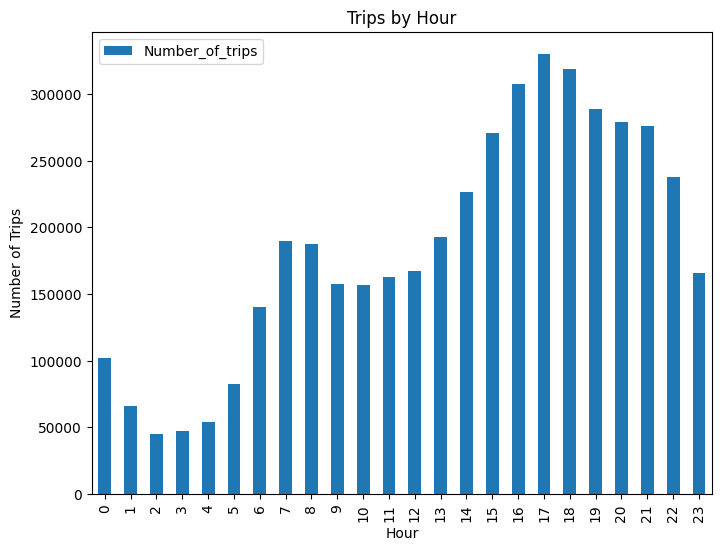

In [18]:
df_hour.plot(kind='bar', figsize=(8,6))

plt.ylabel('Number of Trips')
plt.title('Trips by Hour')

plt.show()

#### Analyzing the results to find the peak hour.

In [19]:
#The highest number of trips by hour
max_trips_by_hour = max(df_hour['Number_of_trips'])
max_hour = df_hour['Number_of_trips'].idxmax()

print(f"Uber's peak hour is {max_hour}:00, the highest number of trips is{max_trips_by_hour}")

Uber's peak hour is 17:00, the highest number of trips is330024


We observe that the number of trips are higher around 16:00 and 18:00, with a spike at 17:00. It matches the end of a working day in the United States (16:30), the time when the workers go home.

We can say that the majority of Uber's clients are workers.

In [20]:
import os

import plotly.express as px
import plotly.graph_objects as go

### 2. Trips by Month

In [21]:
#Grouping by Month
df_month = df.groupby(['Month'],sort=False).size().reset_index(name='Number_of_trips')

#Setting 'Month' as the index
df_month.set_index('Month', inplace=True)

df_month

,Number_of_trips
Month,
April,556767
May,642360
June,653158
July,781969
August,813393
September,1004099


#### Plotting the results

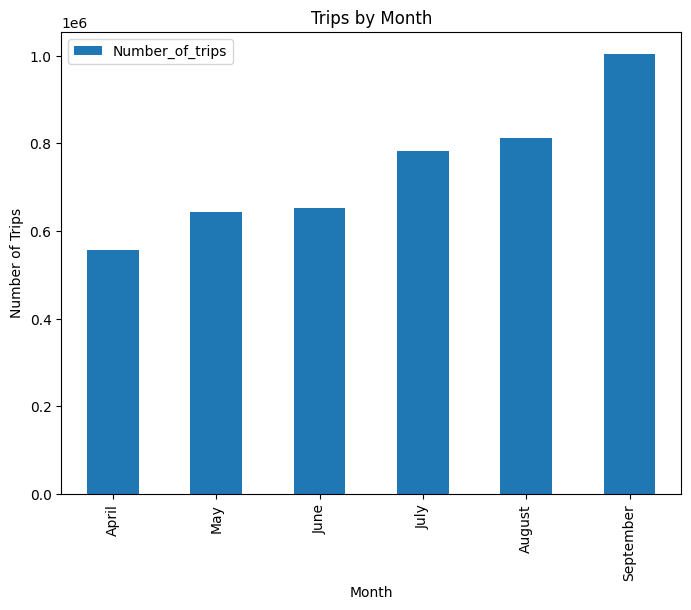

In [22]:
df_month.plot(kind='bar', figsize=(8,6))

plt.ylabel('Number of Trips')
plt.title('Trips by Month')

plt.show()

#### Analyzing the results

We observe that the number of trips keeps on increasing each month, with a peak increase between August and September.

In [23]:
number_of_trips_aug = df_month.loc['August'].values
number_of_trips_sep = df_month.loc['September'].values

ratio_month = (((number_of_trips_sep - number_of_trips_aug)
               /number_of_trips_aug)*100)[0]

ratio_month = round(ratio_month)

print(f"The number of trips increased by {ratio_month}% from August to September.")

The number of trips increased by 23% from August to September.


From our results we can say that from April to August 2014, Uber was in a continuous improvement process.

### 3. Trips by Weekdays

In [24]:
#Grouping by Weekday
df_weekday = df.groupby(['Weekday'],sort = False).size().reset_index(name="Number_of_trips")

#Setting 'Weekday' as the index
df_weekday.set_index('Weekday', inplace=True)

df_weekday

,Number_of_trips
Weekday,
Tuesday,651753
Wednesday,683604
Thursday,741372
Friday,727532
Saturday,634194
Sunday,481158
Monday,532133


#### Plotting the results

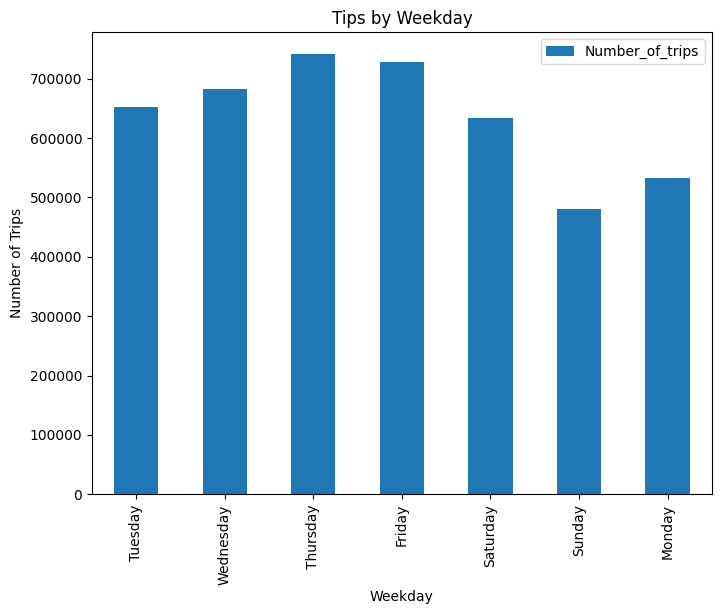

In [25]:
df_weekday.plot(kind = 'bar', figsize=(8,6))

plt.ylabel('Number of Trips')
plt.title('Tips by Weekday')

plt.show()

#### Analyzing the results

In [26]:
#Minimum number of trips by weekday
min_number_of_trips_weekday = min(df_weekday['Number_of_trips'])
min_weekday = df_weekday['Number_of_trips'].idxmin()

print(f"The lowest number of trips occurred on {min_weekday}, with only {min_number_of_trips_weekday} trips.")

The lowest number of trips occurred on Sunday, with only 481158 trips.


In [27]:
#Finding the relation between weekend and weekday trips

#Getting the mean of trips in weekend(non working days)
mean_number_of_trips_weekend = ((df_weekday.loc['Saturday'] 
                                 + df_weekday.loc['Sunday'])/2).values

#Getting the mean of trips in weekday(working days)
mean_number_of_trips_workday = (((df_weekday.loc['Monday'] 
                                  + df_weekday.loc['Tuesday'] 
                                  + df_weekday.loc['Wednesday'] 
                                  + df_weekday.loc['Thursday'] 
                                  + df_weekday.loc['Friday'])/ 5).values)[0]

ratio_weekday = (((mean_number_of_trips_workday - mean_number_of_trips_weekend)/mean_number_of_trips_weekend)*100)[0]

ratio_weekday = round(ratio_weekday, 1)

print(f"The average number of trips on weekdays is {ratio_weekday}% higher than on weekends.")

The average number of trips on weekdays is 19.7% higher than on weekends.


### 4. Trips by Day

In [28]:
#Grouping by Day
df_day = df.groupby(['Day']).size().reset_index(name = 'Number_of_trips')

#Setting 'Day' as index
df_day.set_index('Day', inplace=True)

df_day.head()

,Number_of_trips
Day,
1,125282
2,140767
3,140688
4,138361
5,144547


#### Plotting the results

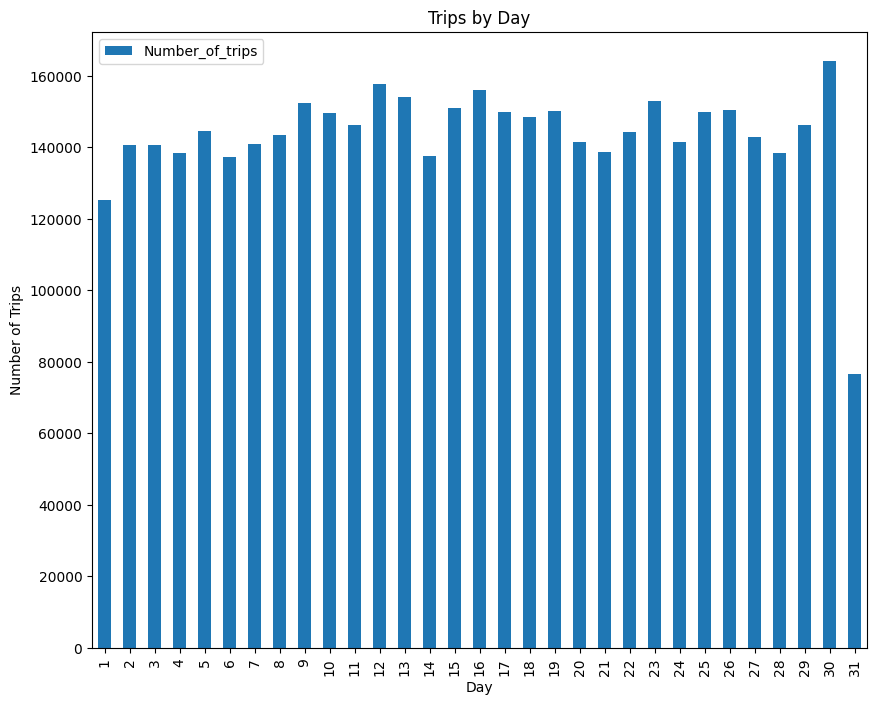

In [29]:
df_day.plot(kind = 'bar', figsize = (10,8))

plt.ylabel('Number of Trips')
plt.title('Trips by Day')

plt.show()

#### Analysing the results

Looking at the trips across the days, we notice an interesting pattern. The 31st stands out for having significantly fewer trips compared to other days. This is because months like April, June, and September only have 30 days, so the 31st doesn't even exist in those months. 

On the flip side, the 30th is always the day with the highest number of trips, showing a clear peak. However, aside from these two days, the number of trips remains quite steady with little variation from day to day.

### 5. Trips by Hour and Month

In [30]:
#Grouping by Hour and Month
df_hour_month = df.groupby(['Hour', 'Month']).size().reset_index(name='Number_of_trips')


#Preparing the data for plotting
df_hour_month = df_hour_month.pivot(index='Hour', columns='Month', values='Number_of_trips')

#Fixing the column names
df_hour_month.columns.name = None 

df_hour_month.head()

,April,August,July,June,May,September
Hour,,,,,,
0,11716,21034,17618,14252,13649,23607
1,7620,14201,11307,9008,8040,15737
2,4849,9876,8379,6082,5257,10455
3,4938,10163,9009,6825,5847,10549
4,5965,11580,9862,7576,6830,12433


#### Plotting the results

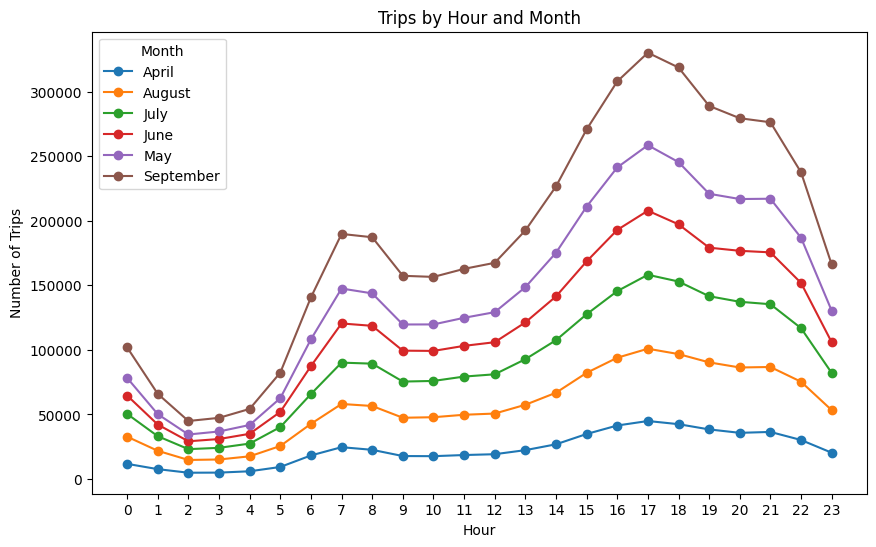

In [31]:
df_hour_month.plot(kind='line', stacked=True, figsize=(10,6), marker='o')
plt.xticks(ticks=range(24), labels=[str(i) for i in range(24)])

plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Month')
plt.legend(title='Month')

plt.show()

### 6. Trips by Weekday and Hour

In [32]:
#Grouping by Hour and Weekday
df_weekday_hour = df.groupby(['Weekday','Hour'],sort=False).size().reset_index(name='Number_of_trips')

#Preparing the data for plotting
df_weekday_hour = df_weekday_hour.pivot(index='Weekday', columns='Hour', values='Number_of_trips')

#Fixing the column names
df_weekday_hour.columns.name = None

df_weekday_hour.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
Friday,13447,8002,5232,6788,8641,13168,22988,31522,30926,24803,...,35569,42910,47315,50997,53746,48657,42713,47389,48471,40498
Monday,6327,3679,2885,6106,9460,14737,23285,30650,28764,21854,...,27696,32201,38149,41351,36359,33512,32279,28401,19805,11588
Saturday,27096,18783,12464,9356,6746,6990,8450,10831,14176,17384,...,30851,38104,42735,42013,44995,40271,37922,42938,47107,42388
Sunday,32275,22610,15126,10393,6261,6086,6492,8584,11909,16113,...,27603,30570,32383,30951,27726,25419,24601,23539,19227,11998
Thursday,9116,5169,3629,5532,8355,13889,26561,36393,34856,27376,...,36048,43604,49615,55645,54768,50927,51044,50938,43381,27203


#### Plotting the results

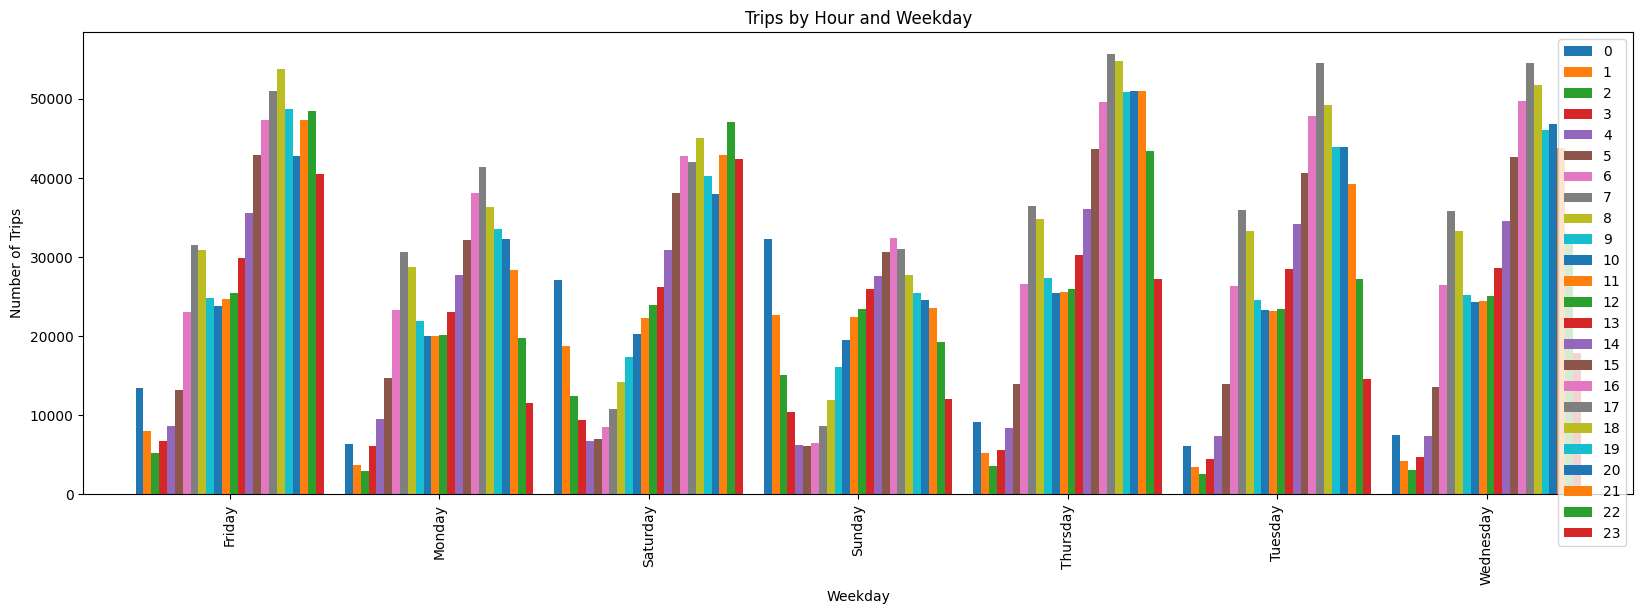

In [33]:
df_weekday_hour.plot(kind='bar', figsize=(20,6), width = 0.9)

plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Weekday')

plt.show()

#### Analysing the Result

Here we notice a clear pattern. In the morning, around 7:00 AM and 8:00 AM, the number of trips spikes, likely because people are heading to work. Then, later in the day, around 5:00 PM and 6:00 PM, there's another increase in trips showing people are heading back to home.

However,On weekends, the pattern changes we could not see this spike Also, On Thursday and Friday, we see more trips around midnight, 1:00 AM, and 2:00 AM compared to the weekdays. This suggests that people tend to go out more at night on weekends, probably for social events or late-night events.

### 7. Trips by Weekday and Month

In [34]:
#Grouping by Weekday and Month
df_month_weekday = df.groupby(['Month', 'Weekday'], sort=False).size().reset_index(name='Number_of_trips')

#Preparing the data for plotting
df_month_weekday = df_month_weekday.pivot(index='Month', columns='Weekday', values='Number_of_trips')

#Fixing the column names
df_month_weekday.columns.name= None

df_month_weekday

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Month,,,,,,,
April,88985,60075,76152,50524,83954,89957,107120
August,145719,90011,129668,108168,121655,105160,113012
July,100987,91672,88626,74976,145791,134968,144949
June,103352,93261,80084,78369,113439,86706,97947
May,131880,62915,101583,55244,126919,75537,88282
September,156609,134199,158081,113877,149614,159425,132294


#### Plotting the results

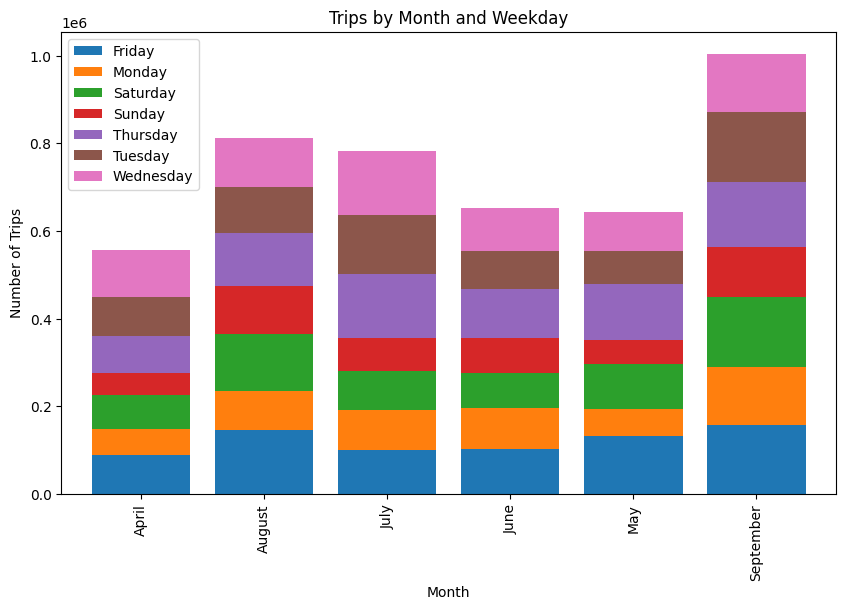

In [35]:
df_month_weekday.plot(kind='bar', figsize=(10,6), stacked=True, width=0.8)

plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month and Weekday')


plt.show()

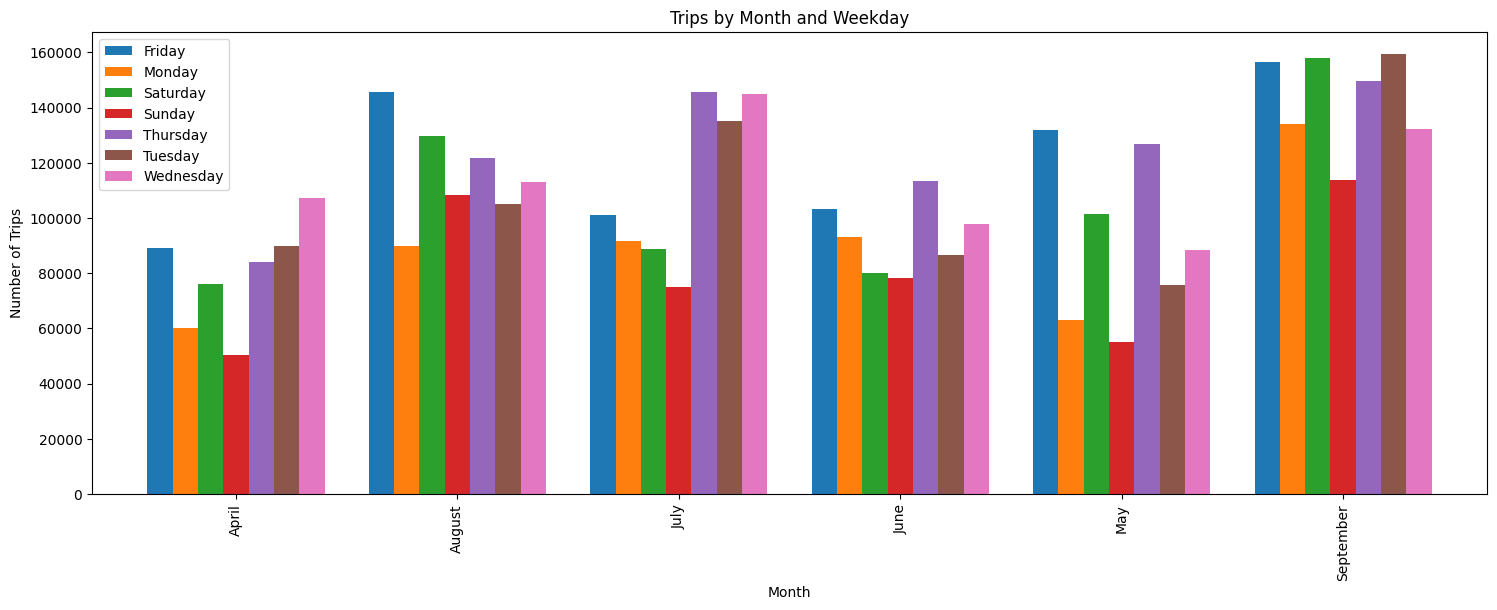

In [36]:
df_month_weekday.plot(kind='bar', figsize=(18,6), width = 0.8)

plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month and Weekday')

plt.show()

## Analysing with help of Heatmap

Through our exploration we are going to visualize:

  
*   Heatmap by Hour and Day.
*   Heatmap by Hour and Weekday.
*   Heatmap by Month and Day.
*   Heatmap by Month and Weekday.

In [37]:
#Defining a function that counts the number of rows
def count_rows(rows):
    return len(rows)

### 1. Heatmap by Hour and Day

In [38]:
#Creating the hour and day dataframe
df_hour_day = df.groupby(['Hour', 'Day']).size().unstack()

df_hour_day.head()

Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Hour,,,,,,,,,,,,,,,,,,,,,
0,3178,2435,3354,2897,2733,4537,3645,2830,2657,3296,...,2787,2546,3200,2405,3810,5196,4123,2678,2401,2174
1,1944,1569,2142,1688,1541,2864,2296,1646,1724,2126,...,1637,1580,2055,1499,3065,3635,2646,1827,1510,1394
2,1256,1087,1407,1199,1030,1864,1507,1123,1222,1464,...,1175,1136,1438,1072,2046,2352,1843,1409,1112,1087
3,1308,1414,1467,1424,1253,1555,1597,1483,1480,1434,...,1468,1429,1493,1439,1806,2055,1802,1678,1403,919
4,1429,1876,1550,1696,1617,1551,1763,1889,1871,1591,...,1934,1957,1798,1943,1730,1723,1883,1948,1841,773


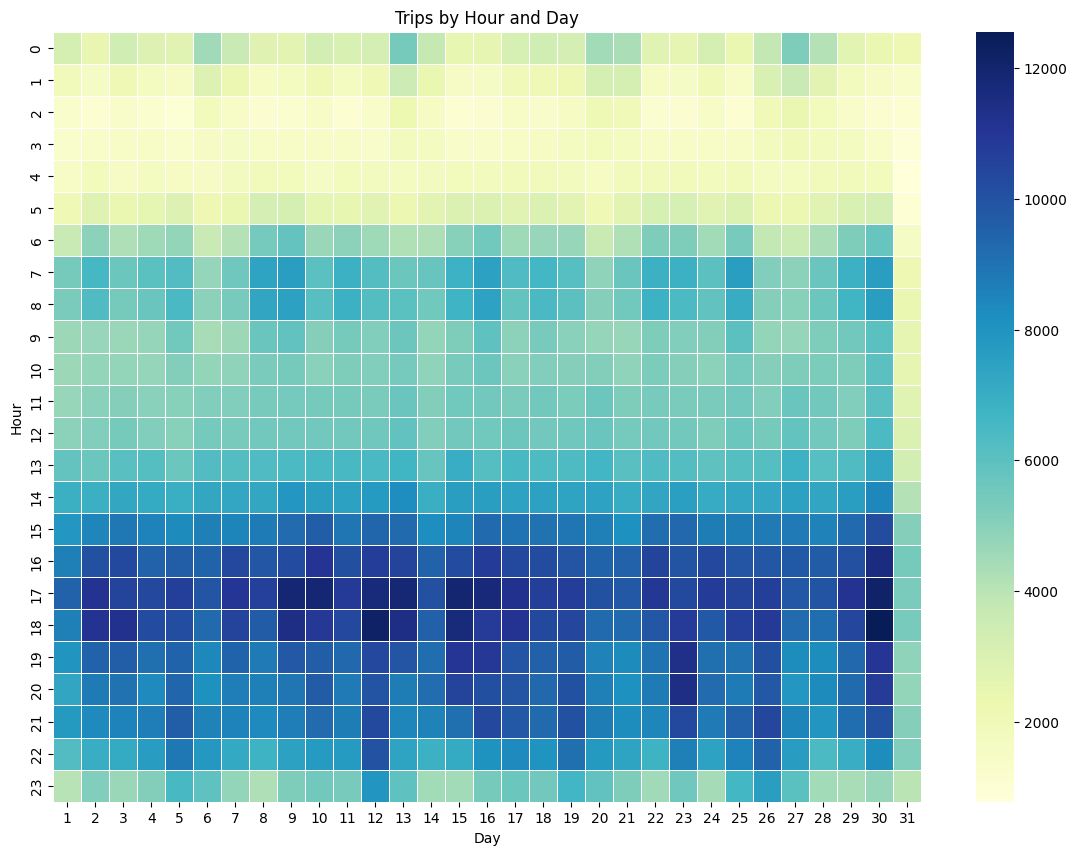

In [39]:
plt.figure(figsize = (14,10))

#Using the seaborn heatmap function 
ax = sns.heatmap(df_hour_day, cmap=cm.YlGnBu, linewidth = .5)
ax.set(title="Trips by Hour and Day");

### Analysing the Results

The number of trips gradually increases throughout the day, reaching its highest demand in the evening between 16:00 and 18:00. This aligns with the time when most employees finish work and head home, leading to a surge in ride requests.

### 2. Heatmap by Hour and Weekday

In [40]:
df_hour_weekday = df.groupby(['Hour', 'Weekday']).size().unstack()

df_hour_weekday.head()

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Hour,,,,,,,
0,13447,6327,27096,32275,9116,6116,7499
1,8002,3679,18783,22610,5169,3437,4233
2,5232,2885,12464,15126,3629,2502,3060
3,6788,6106,9356,10393,5532,4394,4762
4,8641,9460,6746,6261,8355,7404,7379


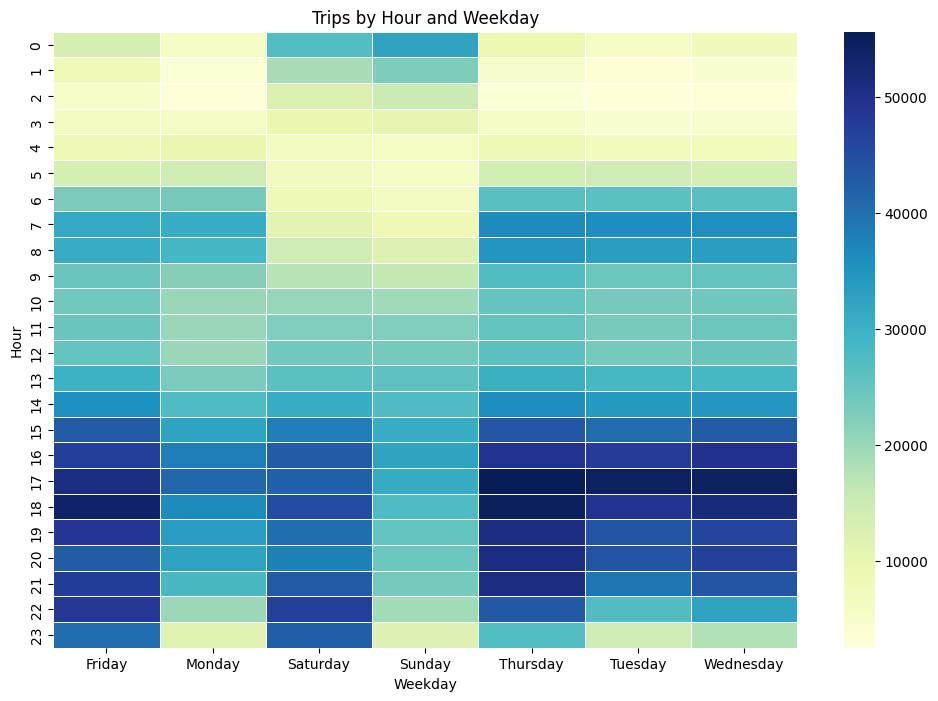

In [41]:
plt.figure(figsize = (12,8))

ax = sns.heatmap(df_hour_weekday, cmap=cm.YlGnBu, linewidth = .5)
ax.set(title="Trips by Hour and Weekday");

### Analysing the Results

During weekdays (Monday to Friday), trip demand is noticeably higher between 16:00 and 21:00, reinforcing the pattern seen in the first heatmap. This reflects the evening rush when people leave work.

On Fridays, the demand stays high until 23:00 and extends into early Saturday, likely due to people heading out for dinner or drinks as they transition into the weekend. A similar trend appears on Saturdays, with trip numbers remaining high well into early Sunday, showing that weekends are popular for nightlife and social outings.

### 3. Heatmap by Day and Month

In [42]:
df_day_month = df.groupby(['Day', 'Month']).size().unstack()

#Fixing the NaN values due to 30 days in months
print(df_day_month.isna().sum())
df_day_month = df_day_month.fillna(0)

df_day_month.head

Month
April        1
August       0
July         0
June         1
May          0
September    1
dtype: int64


<bound method NDFrame.head of Month    April   August     July     June      May  September
Day                                                          
1      14376.0  31686.0  20875.0  15755.0  23009.0    19581.0
2      17230.0  28135.0  26040.0  17222.0  23901.0    28239.0
3      20482.0  22736.0  21208.0  22282.0  21973.0    32007.0
4      26353.0  24458.0  13921.0  22454.0  13668.0    37507.0
5      19273.0  27592.0  10693.0  27918.0  17614.0    41457.0
6      13248.0  29828.0  11253.0  24271.0  19018.0    39695.0
7      19319.0  32102.0  18014.0  20574.0  21488.0    29486.0
8      15996.0  29844.0  25320.0  15536.0  27081.0    29753.0
9      16631.0  25876.0  27308.0  22912.0  25954.0    33819.0
10     19785.0  20222.0  29974.0  22490.0  22144.0    35100.0
11     20137.0  22289.0  28243.0  25281.0  14606.0    35579.0
12     17920.0  29137.0  25488.0  29375.0  17198.0    38607.0
13     11948.0  29259.0  20707.0  30704.0  19204.0    42169.0
14     12511.0  29868.0  26923.0  19081.

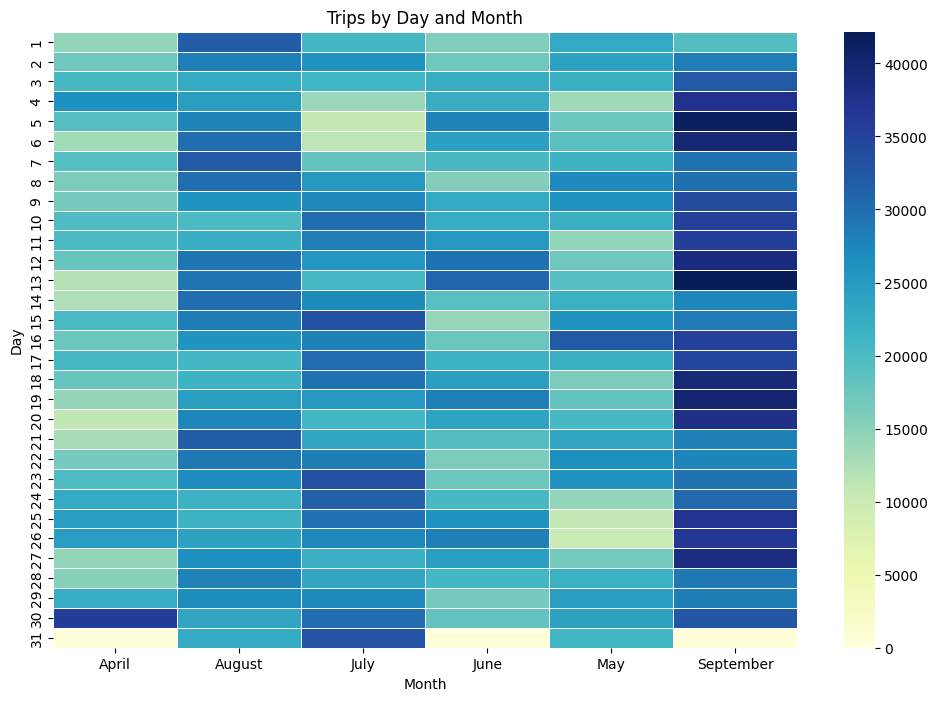

In [43]:
plt.figure(figsize = (12,8))

ax = sns.heatmap(df_day_month, cmap = cm.YlGnBu, linewidth = 0.5)
ax.set(title="Trips by Day and Month");

### Analysing the Result

We observe a steady increase in the number of trips each month, suggesting that from April to September 2014, Uber was experiencing continuous growth.

Analysis for Month and Day

The visualization reveals a **dark spot on April 30**, indicating an unusually high number of trips compared to other days in the month. Unfortunately, we couldn't find any factual information to explain this spike. It could be attributed to a successful marketing campaign or a special event. Given its extreme nature, we consider this day an outlier as we continue the analysis.

Additionally, we observe **zero trips recorded on April 31, June 31**, and September 31, confirming that these months have only 30 days.

### 4. Heatmap by Month and Weekday

In [44]:
df_month_weekday = df.groupby(['Month','Weekday']).size().unstack()

df_month_weekday.head()

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Month,,,,,,,
April,88985,60075,76152,50524,83954,89957,107120
August,145719,90011,129668,108168,121655,105160,113012
July,100987,91672,88626,74976,145791,134968,144949
June,103352,93261,80084,78369,113439,86706,97947
May,131880,62915,101583,55244,126919,75537,88282


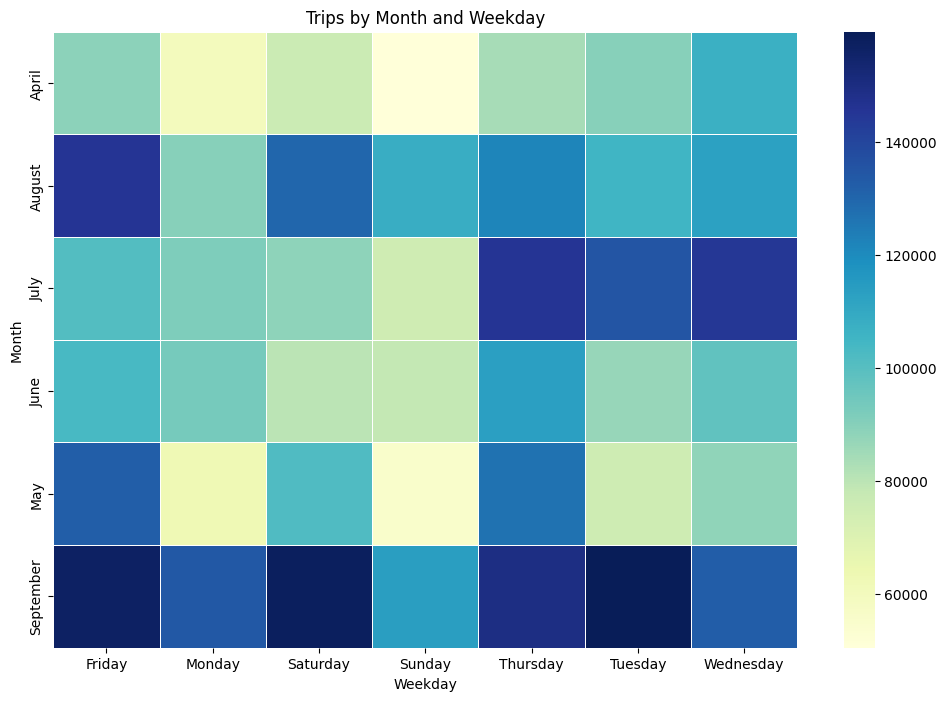

In [45]:
plt.figure(figsize = (12,8))

ax = sns.heatmap(df_month_weekday, cmap= cm.YlGnBu, linewidth = .5)
ax.set(title="Trips by Month and Weekday");

The heatmap reveals that **September experiences the highest trip volumes**, particularly on Fridays, Tuesdays, and Thursdays, likely due to increased commuting and seasonal factors. **Fridays consistently show high trip activity across all months**, reflecting weekend outings and social gatherings. August and May also see strong demand, especially on Mondays, Fridays, and Thursdays, possibly due to vacation and pre-summer travel. In contrast, Mondays and Sundays have lower trip volumes, suggesting reduced commuting needs. An **unusual spike on a Sunday in July** might indicate a special event or holiday driving demand.

## Conclusion

Through our analysis of the Uber Pickups in New York City data set in 2014, we managed to get the following informations:

* The peak demand hour 17:00.
* The main customer category are workers.
* An indicator of Uber's improvement from April to September.
* People tend to use Uber to go to work around 7:00 and 8:00 on working days.
* People tend to use Uber late at night (around midnight) during weekends.
* We should investigate why people don't use uber on Mondays as much as they do on other working days.

Our analysis of Uber pickups in New York City during 2014 reveals clear patterns in user behavior and trip demand. **Workers form the primary customer base**, with significant morning activity around **7:00 to 8:00 AM** as they commute to work. **Evening hours, particularly around 5:00 PM**, see the highest demand, aligning with the typical end of the workday. The data also highlights a **strong preference for Uber on weekends**, especially around midnight, suggesting that many users rely on the service for late-night travel and social outings. Additionally, Uber experienced **consistent growth from April to September**, indicating a period of expansion or increased adoption among users. However, **Mondays stand out as an anomaly**, with noticeably lower trip volumes compared to other weekdays, raising questions about user behavior at the start of the week. Understanding these patterns can help improve Uber’s service strategy, ensuring availability aligns with peak demand and uncovering potential areas for growth.

# Training and Testing of Predictive Models

### Importing necessary modules

In [46]:
import xgboost as xgb
from sklearn.model_selection import KFold
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit


### Defining functions for Time Series Decomposition, MAPE Calculation, and Prediction Plots


In [47]:
def PlotDecomposition(result):  #This function is used to visualize the results of time series decomposition
    plt.figure(figsize=(22, 18))
    
    plt.subplot(4, 1, 1)
    plt.plot(result.observed, label='Observed', lw=1)
    plt.legend(loc='upper left')
    
    plt.subplot(4, 1, 2)
    plt.plot(result.trend, label='Trend', lw=1)
    plt.legend(loc='upper left')
    
    plt.subplot(4, 1, 3)
    plt.plot(result.seasonal, label='Seasonality', lw=1)
    plt.legend(loc='upper left')
    
    plt.subplot(4, 1, 4)
    plt.plot(result.resid, label='Residuals', lw=1)
    plt.legend(loc='upper left')
    
    plt.show()


def CalculateError(pred, sales):     #This function calculates the Mean Absolute Percentage Error (MAPE) manually
    percentual_errors = []
    for A_i, B_i in zip(sales, pred):
        percentual_error = abs((A_i - B_i) / B_i)
        percentual_errors.append(percentual_error)
    return sum(percentual_errors) / len(percentual_errors)


def PlotPredictions(plots, title):    #A custom plotting utility to visualize multiple models or datasets on the same graph
    plt.figure(figsize=(18, 8))
    for plot in plots:
        plt.plot(plot[0], plot[1], label=plot[2], linestyle=plot[3], color=plot[4], lw=1)
    plt.xlabel('Date')
    plt.ylabel("Trips")
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=30, ha='right')
    plt.show()


def create_lagged_features(data, window_size):     #Function to Generate Windowed (Lagged) Features for Model Training

    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)



In [48]:
# Make sure 'Date_time' column is your datetime index
df.set_index('Date_time', inplace=True)

# Group by hour and count occurrences of 'Base'
hourly_counts = df['Base'].resample('H').count()

# Convert the series to a dataframe
df_hourly = hourly_counts.reset_index()

# Rename columns for clarity
df_hourly.columns = ['Date', 'Count']
df_hourly.set_index('Date', inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1744\668231302.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_counts = df['Base'].resample('H').count()


In [49]:
df.head()

,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute
Date_time,,,,,,,,
2014-04-01 00:11:00,40.7690,-73.9549,B02512,April,Tuesday,1,0,11
2014-04-01 00:17:00,40.7267,-74.0345,B02512,April,Tuesday,1,0,17
2014-04-01 00:21:00,40.7316,-73.9873,B02512,April,Tuesday,1,0,21
2014-04-01 00:28:00,40.7588,-73.9776,B02512,April,Tuesday,1,0,28
2014-04-01 00:33:00,40.7594,-73.9722,B02512,April,Tuesday,1,0,33


## Choosing the optimal Train/Test sets

In order to choose the correct train / test sets, we need to first visualize the series, then do a seasonal decompose
if the trend can inform us of a suggested approach to that split

In [50]:
print(df.index.min())
print(df.index.max())

2014-04-01 00:00:00
2014-09-30 22:59:00


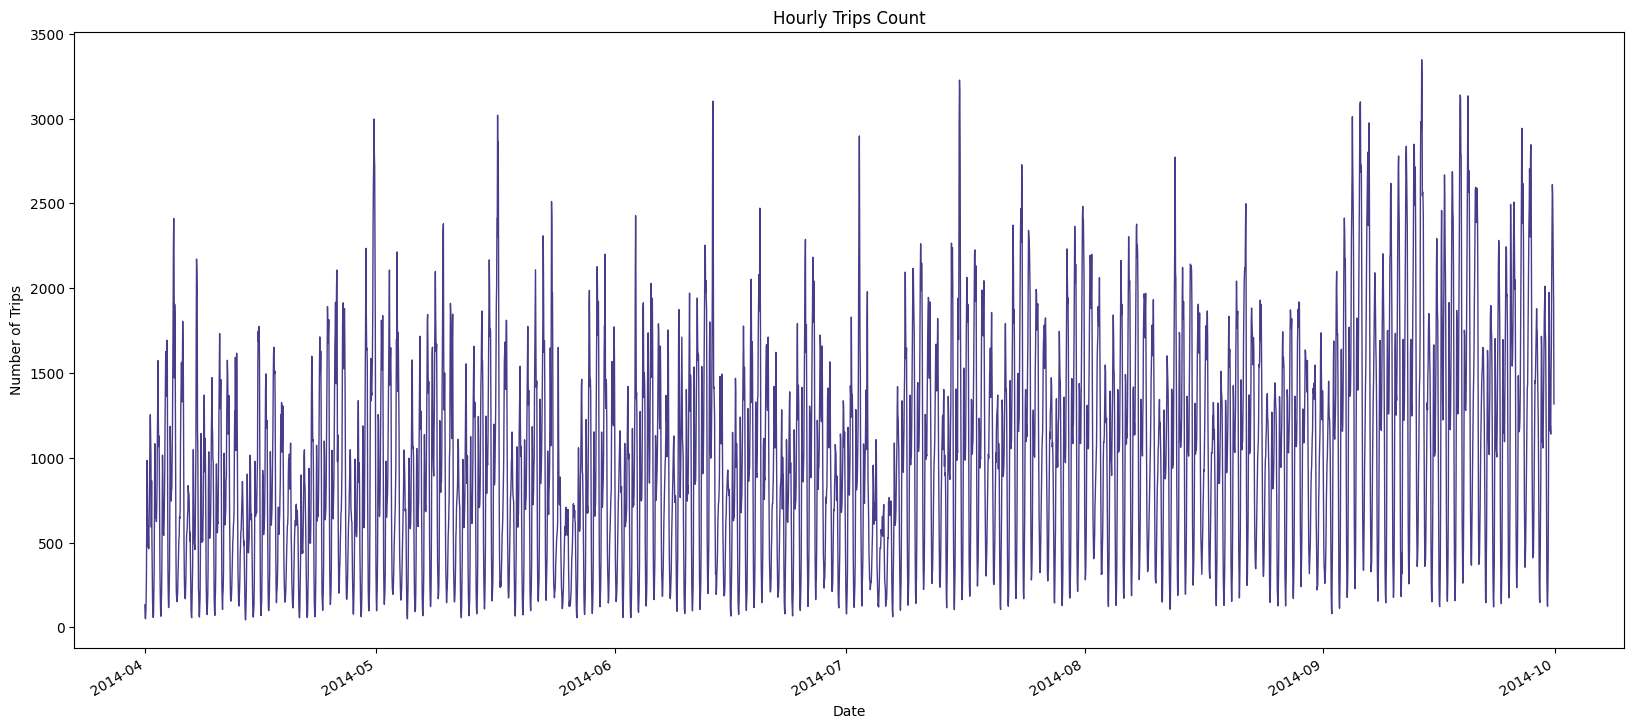

In [51]:
plt.figure(figsize=(20, 8))
plt.plot(df_hourly['Count'], linewidth=1, color='darkslateblue')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.title('Hourly Trips Count')
plt.show()


In [52]:
print(df.index.freq)     # Should show Hourly freq like <Hour>
result = seasonal_decompose(df_hourly['Count'], model='add', period=24)




None


In [53]:
print(df_hourly.index.freq)  
print(df_hourly['Count'].isna().sum())


None
0


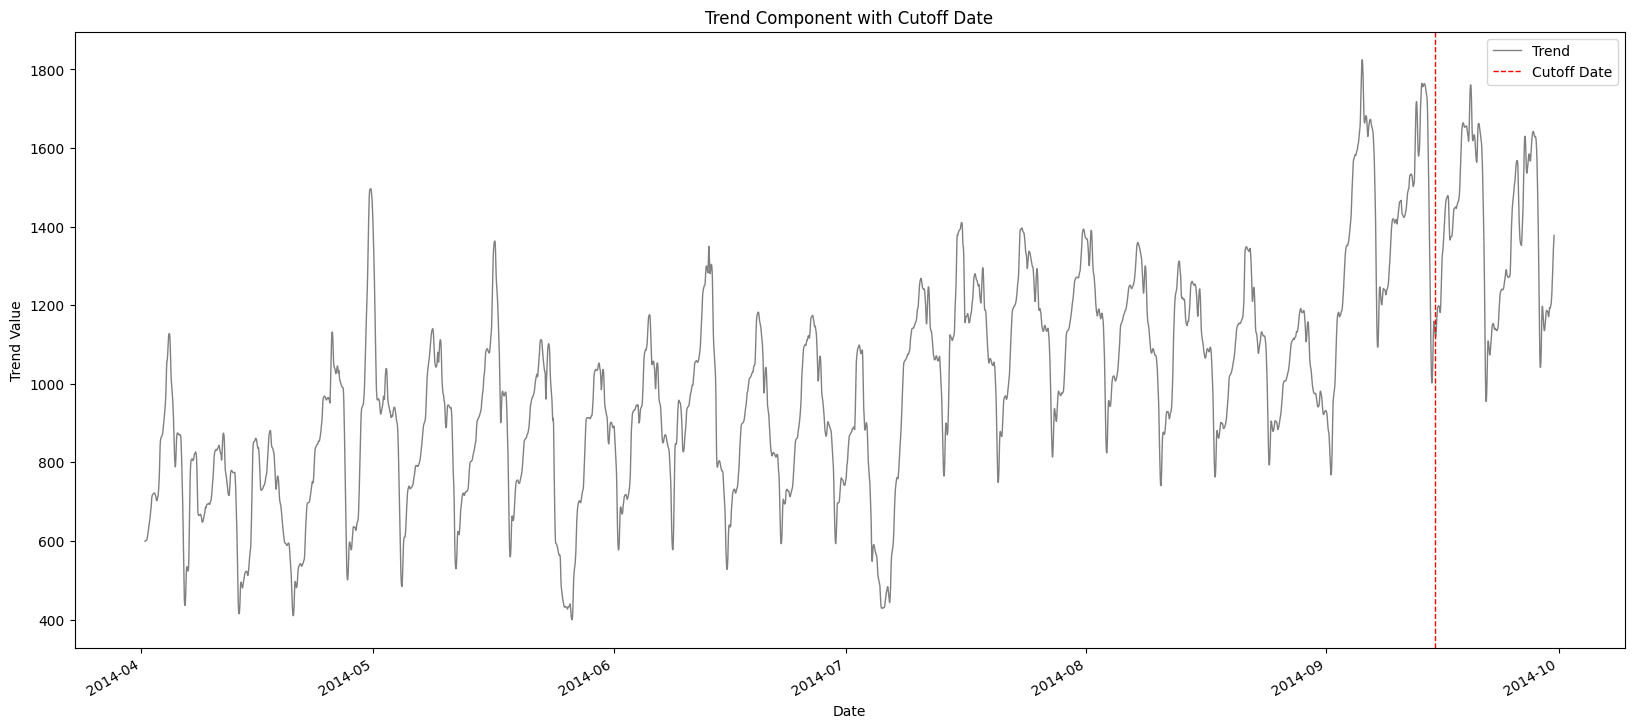

In [54]:
cutoff_date = '2014-09-15 00:00:00'

plt.figure(figsize=(20, 8))

# Plot trend line
plt.plot(result.trend, linewidth=1, color='gray', label='Trend')

# Add vertical cutoff line
plt.axvline(x=pd.Timestamp(cutoff_date), color='red', linestyle='--', linewidth=1, label='Cutoff Date')

# Improve plot aesthetics
plt.xticks(rotation=30, ha='right')
plt.xlabel('Date')
plt.ylabel('Trend Value')
plt.title('Trend Component with Cutoff Date')
plt.legend()
plt.show()


As seen above, the trend stays relatively stable until around September 2014, and then increases to 4 more
peaks. Leaving up to the first 2 peaks as train data and the remaining 2 as test would be sufficient. This is
particularly important, because if we did the usual 80/20 split, we would likely encounter errors due to the said
trend increase.

In [55]:
df = df.sort_index()


In [56]:
df_train = df.loc[:cutoff_date]
df_test = df.loc[pd.Timestamp(cutoff_date) + pd.Timedelta(hours=1):]


In [57]:
print(df_train.columns)
print(df_test.columns)



Index(['Lat', 'Lon', 'Base', 'Month', 'Weekday', 'Day', 'Hour', 'Minute'], dtype='object')
Index(['Lat', 'Lon', 'Base', 'Month', 'Weekday', 'Day', 'Hour', 'Minute'], dtype='object')


In [58]:
# This should be our aggregated dataframe
df_hourly = df['Base'].resample('H').count().reset_index()
df_hourly.columns = ['Date', 'Count']
df_hourly.set_index('Date', inplace=True)

# THEN split train/test on df_hourly
df_train = df_hourly.loc[:cutoff_date]
df_test = df_hourly.loc[pd.Timestamp(cutoff_date) + pd.Timedelta(hours=1):]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1744\2000770557.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df['Base'].resample('H').count().reset_index()


<Axes: title={'center': 'Train / Test Sets'}, xlabel='Date'>

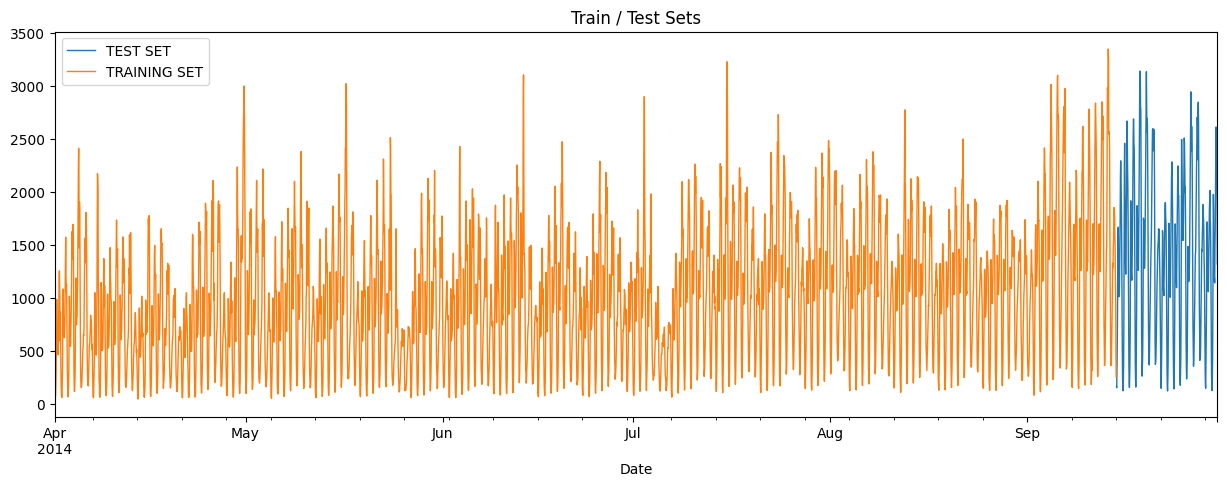

In [59]:
df_test.rename(columns={'Count': 'TEST SET'}) \
    .join(df_train.rename(columns={'Count': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15, 5), title='Train / Test Sets', style='-', lw=1)


In [60]:
# Set the window size
window_size = 24

In [61]:
# Split data into training and test sets
X_train, y_train = create_lagged_features(df_train['Count'].values,
window_size)

In [62]:
# Create test data with window_size overlap
test_data = np.concatenate([df_train['Count'].values[-window_size:], df_test['Count'].values])

# Create lagged features for test set
X_test, y_test = create_lagged_features(test_data, window_size)


In [63]:
seed = 12345

## 1. XGBoost Model Training and Evaluation
We will now train an XGBoost model using lagged features and assess its performance using MAPE.


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best XGBoost Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
XGBoost MAPE: 7.76%


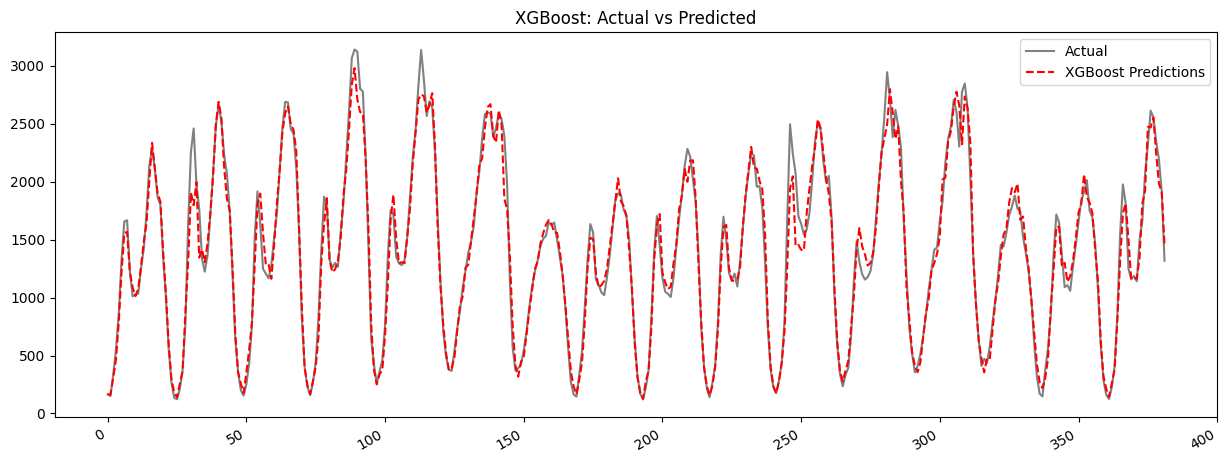

array([ 162.5742 ,  162.87508,  308.62244,  467.01895,  791.7064 ,
       1228.6935 , 1555.0721 , 1565.8589 , 1217.5164 , 1087.2445 ,
       1012.38245, 1073.4137 , 1262.6875 , 1479.9393 , 1641.2981 ,
       2005.5249 , 2333.9954 , 2112.7495 , 1895.9893 , 1828.3408 ,
       1391.2631 , 1032.4261 ,  591.24133,  294.11014,  180.4898 ,
        139.90108,  257.44366,  364.28177,  856.6035 , 1300.1003 ,
       1905.8184 , 1795.5524 , 1994.6794 , 1344.5137 , 1413.7644 ,
       1303.576  , 1468.9524 , 1727.5765 , 2051.7056 , 2495.0188 ,
       2686.8298 , 2542.805  , 2118.1003 , 1850.9816 , 1748.4858 ,
       1262.1102 ,  692.32446,  357.33328,  257.43625,  177.28024,
        352.56476,  549.01984,  780.75397, 1277.094  , 1804.3152 ,
       1896.3076 , 1552.9138 , 1285.0427 , 1289.3588 , 1161.096  ,
       1454.7908 , 1808.0918 , 2093.034  , 2431.2122 , 2591.1682 ,
       2648.6562 , 2493.2017 , 2446.9531 , 2258.9602 , 1579.6998 ,
        914.8821 ,  395.79016,  241.32074,  168.01918,  280.86

In [64]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# -------------------------------------------
# 1. FEATURE ENGINEERING FUNCTION
# -------------------------------------------
def add_time_features(df):
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Day'] = df.index.day
    df['Weekday'] = df.index.weekday
    df['Month'] = df.index.month
    return df

# -------------------------------------------
# 2. LAGGED FEATURES CREATION FUNCTION
# -------------------------------------------
def create_lagged_features(df, window_size):
    df = df.copy()
    X_lags = []
    y = []

    values = df['Count'].values

    for i in range(len(values) - window_size):
        lags = values[i:i + window_size]
        target = values[i + window_size]
        X_lags.append(lags)
        y.append(target)

    X_lags = np.array(X_lags)
    y = np.array(y)

    df = df.iloc[window_size:]
    df = df.reset_index(drop=True)
    return df, X_lags, y

# -------------------------------------------
# 3. XGBOOST MODEL TRAINING + TUNING
# -------------------------------------------
def train_xgboost_model(X_train, y_train, seed=12345):
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 6],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }

    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=seed)
    tscv = TimeSeriesSplit(n_splits=5)

    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        cv=tscv,
        scoring='neg_mean_absolute_percentage_error',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)
    print("Best XGBoost Parameters:", grid_search.best_params_)
    return grid_search

# -------------------------------------------
# 4. PREDICTION & EVALUATION FUNCTION
# -------------------------------------------
def evaluate_model(model, X_test, y_test, test_dates):
    preds = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, preds)
    print(f"XGBoost MAPE: {mape:.2%}")

    # Plot
    plt.figure(figsize=(15, 5))
    plt.plot(test_dates, y_test, label='Actual', color='gray')
    plt.plot(test_dates, preds, label='XGBoost Predictions', linestyle='--', color='red')
    plt.legend()
    plt.title('XGBoost: Actual vs Predicted')
    plt.xticks(rotation=30, ha='right')
    plt.show()
    return preds

# -------------------------------------------
# 5. MAIN FLOW
# -------------------------------------------

# Assuming df_hourly is your aggregated dataframe
cutoff_date = '2014-09-15 00:00:00'

# Split into train/test
train_df = df_hourly.loc[:cutoff_date]
test_df = df_hourly.loc[pd.Timestamp(cutoff_date) + pd.Timedelta(hours=1):]

# Add time features to both
train_df = add_time_features(train_df)
test_df = add_time_features(test_df)

# Merge last lags from train with test to create proper lagged test set
test_input = pd.concat([train_df.tail(24), test_df])

# Create lag features
train_df_lagged, X_train_lag, y_train = create_lagged_features(train_df, window_size=24)
test_df_lagged, X_test_lag, y_test = create_lagged_features(test_input, window_size=24)

# Combine lagged features with time features
X_train_final = np.hstack([X_train_lag, train_df_lagged[['Hour', 'Day', 'Weekday', 'Month']].values])
X_test_final = np.hstack([X_test_lag, test_df_lagged[['Hour', 'Day', 'Weekday', 'Month']].values])

# Train the model
xgb_grid_search = train_xgboost_model(X_train_final, y_train)

# Evaluate
evaluate_model(xgb_grid_search.best_estimator_, X_test_final, y_test, test_df_lagged.index)


In [65]:
xgb_predictions = xgb_grid_search.best_estimator_.predict(X_test_final)


## 2. Random Forest Model Training and Evaluation
We will now train a Random Forest model using lagged features and assess its performance using MAPE.

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best RF Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest MAPE: 8.02%


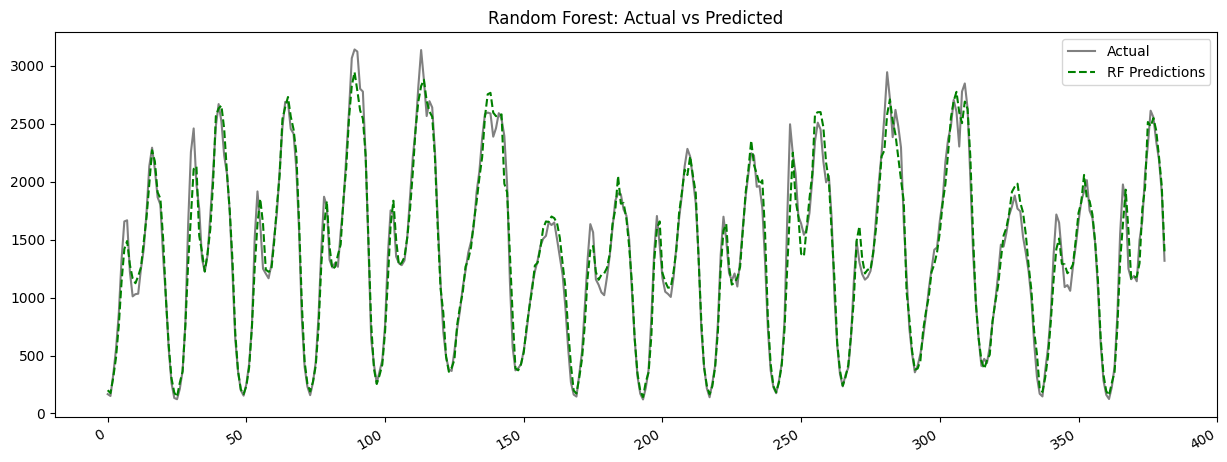

array([ 200.64 ,  176.18 ,  308.56 ,  482.29 ,  757.975, 1136.13 ,
       1417.215, 1487.295, 1282.63 , 1163.515, 1123.41 , 1184.605,
       1260.94 , 1480.385, 1690.41 , 1977.395, 2269.65 , 2175.09 ,
       1907.325, 1853.075, 1503.22 ,  987.845,  590.245,  304.32 ,
        180.735,  143.925,  265.425,  360.92 ,  758.485, 1288.905,
       1699.085, 2107.91 , 2131.56 , 1531.795, 1392.77 , 1225.32 ,
       1379.71 , 1591.405, 1991.14 , 2564.63 , 2630.97 , 2655.395,
       2452.95 , 2075.965, 1750.92 , 1316.805,  689.45 ,  364.345,
        207.51 ,  167.435,  238.53 ,  398.29 ,  743.93 , 1256.275,
       1637.385, 1850.865, 1633.69 , 1239.95 , 1222.16 , 1238.14 ,
       1475.93 , 1787.94 , 2056.58 , 2538.785, 2642.21 , 2729.28 ,
       2560.78 , 2450.605, 2243.195, 1645.805,  943.995,  447.355,
        256.77 ,  190.38 ,  273.085,  410.93 ,  733.58 , 1277.245,
       1617.865, 1830.175, 1434.585, 1245.915, 1264.405, 1367.125,
       1457.97 , 1849.73 , 2117.675, 2547.97 , 2825.75 , 2944.

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------
# 1. Feature Engineering Function (reuse this if needed)
def add_time_features(df):
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Day'] = df.index.day
    df['Weekday'] = df.index.weekday
    df['Month'] = df.index.month
    return df

# -------------------------------------------
# 2. Lagged Features Function (same logic as XGBoost block)
def create_lagged_features(df, window_size):
    df = df.copy()
    X_lags = []
    y = []

    values = df['Count'].values
    for i in range(len(values) - window_size):
        lags = values[i:i + window_size]
        target = values[i + window_size]
        X_lags.append(lags)
        y.append(target)

    df = df.iloc[window_size:]
    df = df.reset_index(drop=True)
    return df, np.array(X_lags), np.array(y)

# -------------------------------------------
# 3. Train Random Forest with GridSearchCV
def train_random_forest(X_train, y_train, seed=12345):
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
    }
    rf = RandomForestRegressor(random_state=seed)

    tscv = TimeSeriesSplit(n_splits=5)
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=tscv,
        scoring='neg_mean_absolute_percentage_error',
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)
    print("Best RF Parameters:", grid_search.best_params_)
    return grid_search

# -------------------------------------------
# 4. Evaluation & Plot
def evaluate_rf(model, X_test, y_test, test_dates):
    preds = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, preds)
    print(f"Random Forest MAPE: {mape:.2%}")

    plt.figure(figsize=(15, 5))
    plt.plot(test_dates, y_test, label='Actual', color='gray')
    plt.plot(test_dates, preds, label='RF Predictions', linestyle='--', color='green')
    plt.legend()
    plt.title('Random Forest: Actual vs Predicted')
    plt.xticks(rotation=30, ha='right')
    plt.show()
    return preds

# -------------------------------------------
# 5. Example Main Flow (modular usage)
cutoff_date = '2014-09-15 00:00:00'

# Split your df_hourly
train_df = df_hourly.loc[:cutoff_date]
test_df = df_hourly.loc[pd.Timestamp(cutoff_date) + pd.Timedelta(hours=1):]

# Add time-based features
train_df = add_time_features(train_df)
test_df = add_time_features(test_df)

# Merge for lag features on test set
test_input = pd.concat([train_df.tail(24), test_df])

# Create lag features
train_df_lagged, X_train_lag, y_train = create_lagged_features(train_df, window_size=24)
test_df_lagged, X_test_lag, y_test = create_lagged_features(test_input, window_size=24)

# Combine lagged features with time features
X_train_final = np.hstack([X_train_lag, train_df_lagged[['Hour', 'Day', 'Weekday', 'Month']].values])
X_test_final = np.hstack([X_test_lag, test_df_lagged[['Hour', 'Day', 'Weekday', 'Month']].values])

# Train RF
rf_grid_search = train_random_forest(X_train_final, y_train)

# Evaluate
evaluate_rf(rf_grid_search.best_estimator_, X_test_final, y_test, test_df_lagged.index)


In [67]:
rf_predictions = rf_grid_search.best_estimator_.predict(X_test_final)



## 3. Gradient Boosted Tree Regressor (GBTR) Model Training and Evaluation
We will now train a GBTR model using lagged features and assess its performance using MAPE.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error

# -------------------------------------------
# 1. Train GBRT with GridSearchCV
def train_gbrt_model(X_train, y_train, seed=12345):
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.8, 1.0]
    }

    gbrt = GradientBoostingRegressor(random_state=seed)

    tscv = TimeSeriesSplit(n_splits=3)  # reducing splits for faster run
    grid_search = GridSearchCV(
        estimator=gbrt,
        param_grid=param_grid,
        cv=tscv,
        scoring='neg_mean_absolute_percentage_error',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)
    print("Best GBRT Parameters:", grid_search.best_params_)
    return grid_search

# -------------------------------------------
# 2. Evaluation & Plot
def evaluate_gbrt(model, X_test, y_test, test_dates):
    preds = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, preds)
    print(f"GBRT MAPE: {mape:.2%}")

    plt.figure(figsize=(15, 5))
    plt.plot(test_dates, y_test, label='Actual', color='gray')
    plt.plot(test_dates, preds, label='GBRT Predictions', linestyle='--', color='orange')
    plt.legend()
    plt.title('GBRT: Actual vs Predicted')
    plt.xticks(rotation=30, ha='right')
    plt.show()
    return preds

# -------------------------------------------
# 3. Main flow usage (reusing earlier lag + time features)
# Assuming df_hourly, train_df, test_df, and lag feature creation have been done already

# Train GBRT model
gbrt_grid_search = train_gbrt_model(X_train_final, y_train)

# Evaluate GBRT
evaluate_gbrt(gbrt_grid_search.best_estimator_, X_test_final, y_test, test_df_lagged.index)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [ ]:
gbr_predictions = gbrt_grid_search.best_estimator_.predict(X_test_final)


## Visualizing all models at once

In [ ]:
# Reconstruct datetime column
test_df_lagged['Date_time'] = pd.to_datetime({
    'year': 2014,  # or your actual year
    'month': test_df_lagged['Month'],
    'day': test_df_lagged['Day'],
    'hour': test_df_lagged['Hour']
})

test_df_lagged.set_index('Date_time', inplace=True)



In [ ]:
test_df_lagged.sort_index(inplace=True)


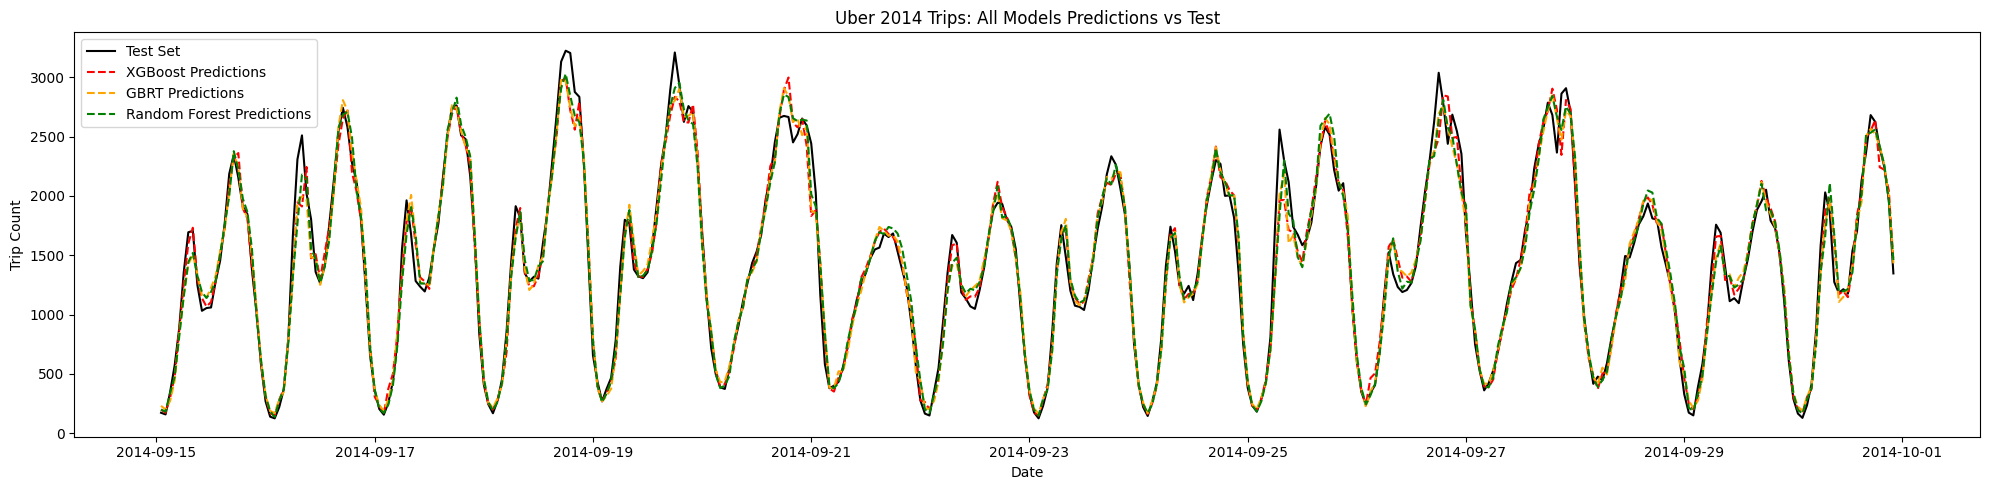

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

# True values
plt.plot(test_df_lagged.index, y_test, label='Test Set', color='black')

# XGBoost Predictions
plt.plot(test_df_lagged.index, xgb_predictions, label='XGBoost Predictions', color='red', linestyle='--')

# GBRT Predictions (corrected variable)
plt.plot(test_df_lagged.index, gbr_predictions, label='GBRT Predictions', color='orange', linestyle='--')

# Random Forest Predictions
plt.plot(test_df_lagged.index, rf_predictions, label='Random Forest Predictions', color='green', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Trip Count')
plt.title('Uber 2014 Trips: All Models Predictions vs Test')
plt.legend()
plt.tight_layout()
plt.show()



The above plot shows how all algorithms have actually being very close to predicting the test set. Visually, we can
safely assume that using either algorithm could be a safe bet. The last step is to try an ensemble to

## Ensemble

Building the ensemble requires to understand how each algorithm has performed individually first. Then, decide
how we can leverage each one's strenghts to our advantage.

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate MAPE for each model
xgb_mape = mean_absolute_percentage_error(y_test, xgb_predictions)
rf_mape = mean_absolute_percentage_error(y_test, rf_predictions)
gbr_mape = mean_absolute_percentage_error(y_test, gbr_predictions)

# Display results
print(f'XGBoost MAPE:\t\t\t{xgb_mape:.2%}')
print(f'Random Forest MAPE:\t\t{rf_mape:.2%}')
print(f'GBRT MAPE:\t\t\t{gbr_mape:.2%}')


XGBoost MAPE:			7.67%
Random Forest MAPE:		8.02%
GBRT MAPE:			8.69%


The results indicate that XGBoost has the lowest MAPE, followed closely by the ensemble model, suggesting it is the most accurate for this dataset.


Convert MAPE scores to weights: Since MAPE is inversely related to model performance, we can use the
reciprocal of MAPE as a starting point for determining the weights. Normalize these reciprocals to get the weights.
The ensemble prediction formula can be expressed as follows:

* Reciprocal of XGBoost MAPE = 1/7.67 ≈ 0.130
* Reciprocal of Random Forest MAPE = 1/8.02 ≈ 0.124
* Reciprocal of GBTR MAPE = 1/8.69 ≈ 0.115

### Normalize the weights

In [ ]:
# Raw reciprocals
inv_xgb = 0.130
inv_rf = 0.124
inv_gbr = 0.115

# Normalize
total = inv_xgb + inv_rf + inv_gbr
w_xgb = inv_xgb / total
w_rf = inv_rf / total
w_gbr = inv_gbr / total

print(f"XGBoost Weight: {w_xgb:.3f}")
print(f"Random Forest Weight: {w_rf:.3f}")
print(f"GBRT Weight: {w_gbr:.3f}")

XGBoost Weight: 0.352
Random Forest Weight: 0.336
GBRT Weight: 0.312


### Now apply these weights to create your ensemble prediction:

In [ ]:
# Final ensemble prediction using your weights
ensemble_prediction = (0.352 * xgb_predictions) + (0.336 * rf_predictions) + (0.312 * gbr_predictions)


### Calculate MAPE for the ensemble

In [ ]:
ensemble_mape = mean_absolute_percentage_error(y_test, ensemble_prediction)
print(f'Ensemble MAPE:\t\t\t{ensemble_mape:.2%}')


Ensemble MAPE:			7.76%


The ensemble MAPE (7.76%) is slightly better than the Random Forest (8.02%) and GBRT (8.69%), and very close to your XGBoost (7.67%) result.

### Potting a graph between Ensemble predictions and Tests

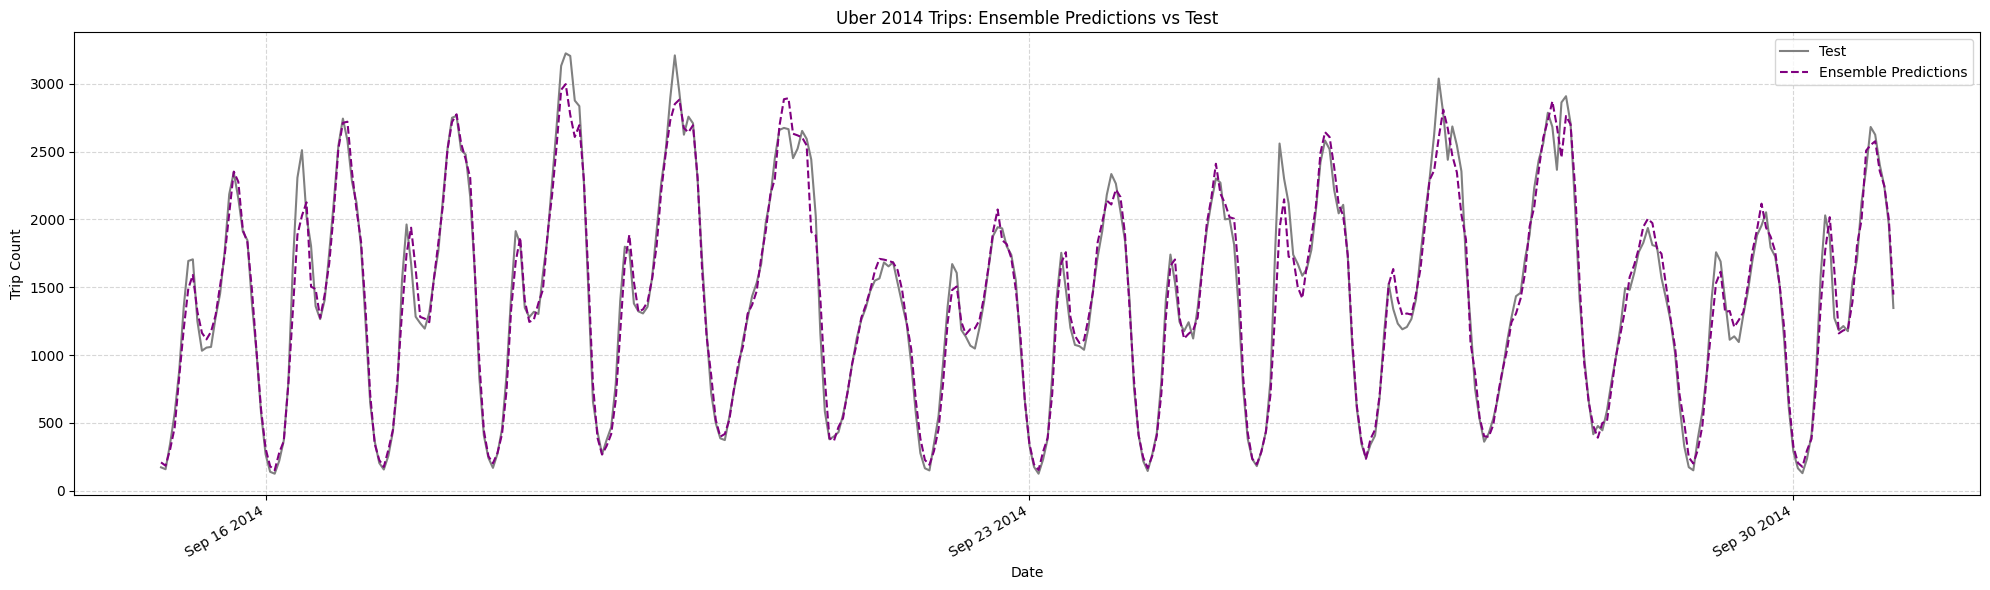

In [ ]:
def PlotPredictions(data_list, title):
    plt.figure(figsize=(20, 6))

    for series in data_list:
        plt.plot(series[0], series[1], label=series[2], linestyle=series[3], color=series[4])

    plt.xlabel('Date')
    plt.ylabel('Trip Count')
    plt.title(title)
    plt.legend()

    # Date formatting for clarity
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d %Y'))
    plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()

# Call it like this with your ensemble output:
PlotPredictions([
    (test_df_lagged.index, y_test, 'Test', '-', 'gray'),
    (test_df_lagged.index, ensemble_prediction, 'Ensemble Predictions', '--', 'purple')
], 'Uber 2014 Trips: Ensemble Predictions vs Test')



**Key takeaways from this graph:**

**Strong alignment:** The purple dashed line closely follows the gray line, meaning the ensemble model is doing a good job at replicating the real-world data.

**Captures seasonality:** The model captures the repetitive patterns (weekly cycles), indicating that temporal trends and seasonality were successfully modeled.

**Minor deviations:** There are some slight mismatches at peak values, but overall the model tracks the data well.

## Insights and Conclusions from Training and Evaluation

### Model Performance Overview:
**XGBoost:** Achieved the best performance with a MAPE of **7.67%**, indicating its strong ability to model the Uber 2014 trip data, capturing complex temporal and feature interactions effectively.

**Random Forest:** Followed closely with a MAPE of **8.02%**, demonstrating solid predictive power, particularly benefiting from the window-based feature engineering to capture time-based patterns.

**Gradient Boosted Regression Trees (GBRT):** Recorded a MAPE of **8.69%**, showing reasonable performance, though slightly less accurate compared to XGBoost and Random Forest.

### Ensemble Model:
The ensemble model combining XGBoost, Random Forest, and GBRT achieved a MAPE of **7.76%**, improving over Random Forest and GBRT, while being slightly higher than XGBoost alone. This suggests that while XGBoost individually performed best, the ensemble offers more stable and balanced predictions by leveraging the strengths of all models.

**Impact of Window-Based Logic:**
Applying window-based logic contributed to capturing seasonality and temporal dependencies effectively across all models. This approach boosted predictive performance and ensured that time-dependent trends were well-represented in the models.

**Cross-Validation and Parameter Tuning:**
Consistent application of cross-validation across time folds provided reliable performance assessments, mitigating overfitting. Hyperparameter tuning, especially for XGBoost and Random Forest, likely contributed to their comparatively strong results.

### Practical Implications:
XGBoost is recommended when the primary objective is to minimize forecasting error.

The ensemble model is a robust alternative, offering strong and stable predictions, which may be preferred in production environments where model reliability and consistency are important.

### Final Conclusion:
The evaluation demonstrates that **XGBoost** is the most effective model with the lowest MAPE of **7.67%**, followed by the ensemble model (7.76%) and Random Forest (8.02%). The ensemble approach effectively aggregates insights from multiple models, enhancing robustness. The application of window-based feature engineering and cross-validation played a crucial role in improving the predictive accuracy of all models, highlighting the importance of temporal considerations in time series forecasting tasks.